# Capstone 2: Modeling

### 5.0 Introduction

Now that we have done data wrangling, EDA, and feature engineering, it's time to start building a model. We have to ask, what kind of model can we build with the data we have? Here, we will attempt to build three models and identify the best one. 
**Steps:**
1. Fit your models with a training dataset.
2. Review model outcomes — Iterate over additional models as needed.
3. Identify the final model that you think is the best model for this project.

### 5.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join

%matplotlib inline

### Part 1: Point-Biserial Correlation

In defining point-biserial correlation, we use an article from [Towards Data Science](https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1) by John DeJesus. Point-biserial correlation is the same as the Pearson correlation coefficient used in linear regression, with the difference being dichotomous data is being compared to continuous data instead of continuous data to continuous data. From this point on we assume that our dichotomous data is composed of items from two groups (group 0 and group 1) and the continuous data as “y”. Our formula is:
$$ rpb = ((M0-M1) / (sy))*(√(n0/n)(n1/n)) $$

- m0 = mean of data from group 0
- m1 = mean of data from group 1
- sy = standard deviation of continuous data
- n0 = number of items in group 0
- n1 = number of items in group 1
- n = number of items in both groups together (or total rows in the dataset)

Point-Biserial correlation function calculates a correlation coefficient (-1 -> negatively perfect, 1 -> positvely perfect) that signifies the strength and direction of association between a binary and a continuous variables. Our first dataset, cremation or burial, we look for the relationship between burial type and cost to LA in pounds. The type of cremation is our binary variable, where we have two separate columns from our dummy variables:
Cremation or Burial_Burial: 1=Burial, 0=Cremation
Cremation or Burial_Crem: 1=Cremation, 0=Burial
The Cost to LA in pounds column is continuous. 

In [2]:
# Calculate correlation between burial type and cost to LA in pounds
path = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\ds.xlsx'
ds = pd.read_excel(path)
ds.head()

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem,Gender_Female,Gender_Male
0,53,Male,214.0,Crem,0,1,0,1
1,40,Male,1002.0,Crem,0,1,0,1
2,63,Male,150.0,Crem,0,1,0,1
3,70,Male,187.0,Crem,0,1,0,1
4,62,Male,68.0,Crem,0,1,0,1


In [3]:
# Use Scipy's pointbiserialr function to get coefficient
stats.pointbiserialr(ds['Cremation or Burial_Burial'],ds['Cost to LA in pounds'])

PointbiserialrResult(correlation=0.2908948104911248, pvalue=0.058428584589139285)

In [4]:
stats.pointbiserialr(ds['Cremation or Burial_Crem'],ds['Cost to LA in pounds'])

PointbiserialrResult(correlation=-0.2908948104911248, pvalue=0.058428584589139285)

#### 5.2 Heatmap for Crematoria dataset

In [14]:
# Import dataset
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_final.xlsx'
xl3_final = pd.read_excel(path2)
xl3_final.head()

,Crematoria,Latitude,Longtitude,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,norm_Total Since Opening,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds,Alfreton (Amber Valley),...,Torquay,Truro,Warrington,Wear Valley,Weeley,West Berkshire (Thatcham),Westerleigh,Weymouth,Whimple (East Devon),Widnes
0,Bedford,52.155162,-0.411665,1744,1824,0.376612,-0.319396,-0.319396,-0.319396,0,...,0,0,0,0,0,0,0,0,0,0
1,Luton,51.911291,-0.389880,1565,1884,0.875557,-0.763394,-0.763394,-0.763394,0,...,0,0,0,0,0,0,0,0,0,0
2,Bracknell,51.391328,-0.780324,2009,2396,0.161008,0.294209,0.294209,0.294209,0,...,0,0,0,0,0,0,0,0,0,0
3,Reading,51.475829,-0.955201,1646,1898,0.947910,-0.319396,-0.319396,-0.319396,0,...,0,0,0,0,0,0,0,0,0,0
4,Slough,51.523431,-0.592800,1358,1368,0.425555,-0.455164,-0.455164,-0.455164,0,...,0,0,0,0,0,0,0,0,0,0


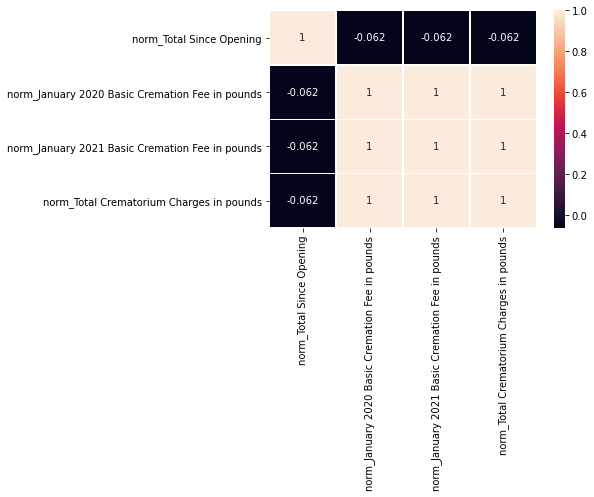

In [15]:
import seaborn as sns

norm_subset = xl3_final[['norm_Total Since Opening', 'norm_January 2020 Basic Cremation Fee in pounds', 'norm_January 2021 Basic Cremation Fee in pounds','norm_Total Crematorium Charges in pounds']]
sns.heatmap(norm_subset.corr(), annot=True, linewidth=0.4)
plt.show()

### 5.3 K-Means and other Clustering Algorithms

In [18]:
xl3_final_ = xl3_final.drop(['Latitude','Longtitude','1 Jan-31 Dec 2019','1 Jan-31 Dec 2020'], axis=1)
xl3_final_.head()

,Crematoria,norm_Total Since Opening,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds,Alfreton (Amber Valley),Amersham (Chilterns),Aston-on-Trent (Trent Valley),Aylesbury Vale,Barnstaple,...,Torquay,Truro,Warrington,Wear Valley,Weeley,West Berkshire (Thatcham),Westerleigh,Weymouth,Whimple (East Devon),Widnes
0,Bedford,0.376612,-0.319396,-0.319396,-0.319396,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Luton,0.875557,-0.763394,-0.763394,-0.763394,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bracknell,0.161008,0.294209,0.294209,0.294209,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Reading,0.947910,-0.319396,-0.319396,-0.319396,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Slough,0.425555,-0.455164,-0.455164,-0.455164,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_pivot = xl3_final_.pivot_table(index='Crematoria', fill_value=0, columns='norm_Total Since Opening')
df_pivot

Alfreton (Amber Valley)                      \
norm_Total Since Opening                     -1.800210 -1.788206 -1.738716   
Crematoria                                                                   
Alfreton (Amber Valley)                              0         0         0   
Amersham (Chilterns)                                 0         0         0   
Aston-on-Trent (Trent Valley)                        0         0         0   
Aylesbury Vale                                       0         0         0   
Barnstaple                                           0         0         0   
...                                                ...       ...       ...   
West Berkshire (Thatcham)                            0         0         0   
Westerleigh                                          0         0         0   
Weymouth                                             0         0         0   
Whimple (East Devon)                                 0         0         0   
Widnes                                               0         0         0   

                                                                        \
norm_Total Since Opening       -1.722280 -1.599971 -1.559873 -1.506958   
Crematoria                                                               
Alfreton (Amber Valley)                0         0         0         0   
Amersham (Chilterns)                   0         0         0         0   
Aston-on-Trent (Trent Valley)          0         0         0         0   
Aylesbury Vale                         0         0         0         0   
Barnstaple                             0         0         0         0   
...                                  ...       ...       ...       ...   
West Berkshire (Thatcham)              0         0         0         0   
Westerleigh                            0         0         0         0   
Weymouth                               0         0         0         0   
Whimple (East Devon)                   0         0         0         0   
Widnes                                 0         0         0         0   

                                                              ...  \
norm_Total Since Opening       -1.345373 -1.313374 -1.269136  ...   
Crematoria                                                    ...   
Alfreton (Amber Valley)                0         0         1  ...   
Amersham (Chilterns)                   0         0         0  ...   
Aston-on-Trent (Trent Valley)          0         0         0  ...   
Aylesbury Vale                         0         0         0  ...   
Barnstaple                             0         0         0  ...   
...                                  ...       ...       ...  ...   
West Berkshire (Thatcham)              0         0         0  ...   
Westerleigh                            0         0         0  ...   
Weymouth                               0         0         0  ...   
Whimple (East Devon)                   0         0         0  ...   
Widnes                                 0         0         0  ...   

                               norm_Total Crematorium Charges in pounds  \
norm_Total Since Opening                                       0.947910   
Crematoria                                                                
Alfreton (Amber Valley)                                             0.0   
Amersham (Chilterns)                                                0.0   
Aston-on-Trent (Trent Valley)                                       0.0   
Aylesbury Vale                                                      0.0   
Barnstaple                                                          0.0   
...                                                                 ...   
West Berkshire (Thatcham)                                           0.0   
Westerleigh                                                         0.0   
Weymouth                                                            0.0   
Whimple (East Devon)              

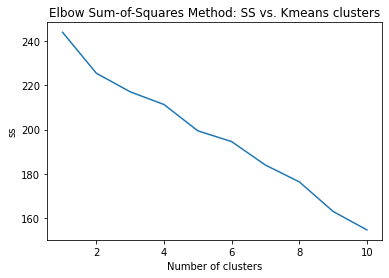

In [23]:
# Plot using elbow method to obtain ideal no. of clusters
from sklearn.cluster import KMeans
import numpy as np
# Create empty list
ss= []

# Make variable x = df_pivot as a matrix with to_numpy()
x_cols = df_pivot.to_numpy()

# Ks = Range
ks = range(1,11)
          
for k in ks:
    km=KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit_predict(x_cols)
    centers=km.cluster_centers_
    ss.append(np.sum((x_cols -centers[km.fit_predict(x_cols)])**2))

# Plot elbow method
plt.plot(ks, ss)
plt.title('Elbow Sum-of-Squares Method: SS vs. Kmeans clusters')
plt.xlabel('Number of clusters')
plt.ylabel('ss')
plt.show()

### 5.4 Visualizing Clusters with PCA

C:\Users\yuvem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Explained Variance by Number of Components')

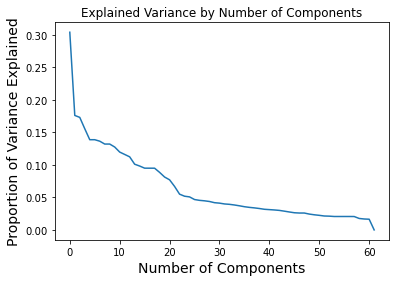

In [37]:
# Create a new PCA model with a default number of components
pca_range = list(range(1,11))
pca = PCA()
pca_model = pca.fit(X)

# Store explained_variance_ in variable called variance
variance = pca.explained_variance_

sns.lineplot(range(len(variance)), variance)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Proportion of Variance Explained", fontsize=14)
plt.title("Explained Variance by Number of Components")

In [39]:
pca = PCA(n_components=2).fit_transform(X)
PCA_df = pd.DataFrame(pca, columns=['PCA 1', 'PCA 2'])
PCA_df

,PCA 1,PCA 2
0,-0.057194,-0.000377
1,-0.126680,-2.301153
2,-0.068733,-0.001023
3,-0.110212,-0.005564
4,-0.086743,-0.003031
...,...,...
57,-0.093968,-0.003299
58,-0.085463,-0.001624
59,-0.057181,-0.000377
60,-0.058772,-0.000403


### 5.5 Agglomerative/Hierachical Clustering

In [42]:
# Import libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

clusters_agglo = AgglomerativeClustering().fit(df_pivot)
labels_agglo = clusters_agglo.labels_
x = np.unique(labels_agglo)
y = np.unique(labels_agglo,return_counts=True)[1]
print(x,y)

[0 1] [61  1]


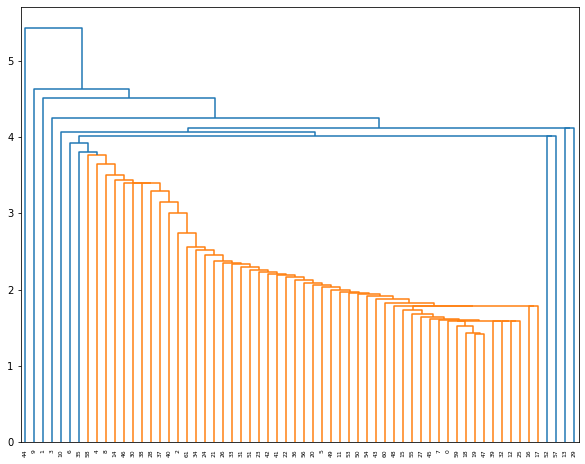

In [43]:
Z = hierarchy.linkage(X, 'complete')

# Plot figure
plt.figure(figsize = (10,8))
dn = hierarchy.dendrogram(Z)

### 5.6 tqdm

In [93]:
# Create Progress Meters or Progress Bars with tqdm
# Split train and test set first
from sklearn.model_selection import train_test_split

xl3_train = xl3_final[['norm_Total Since Opening', 'norm_January 2020 Basic Cremation Fee in pounds','norm_January 2021 Basic Cremation Fee in pounds', 'norm_Total Crematorium Charges in pounds']]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(xl3_train['norm_Total Since Opening'], xl3_train['norm_Total Crematorium Charges in pounds'], train_size=0.75, test_size=0.25, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46,) (16,) (46,) (16,)


In [95]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(46,) (46,) (16,) (16,)


In [96]:
import statsmodels.api as sm

x2 = xl3_final.drop(['norm_Total Crematorium Charges in pounds'], axis=1)

x2 = sm.add_constant(x2)

y = xl3_final[['norm_Total Crematorium Charges in pounds']]
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, shuffle=True)

In [97]:
from tqdm import tqdm

l_test = tqdm(range(0, len(y_test)), desc='Matching')
for i in l_test:
    for j in range(0, len(y_train)):
        for k in range(1, len(y_test.columns)):
            if y_test.iloc[i,k] == y_train.iloc[j,k]:
                continue
            else:
                break
        else:
            xl3_train['norm_Total Crematorium Charges in pounds'].iloc[i, 1] = y_train.iloc[j, -1]
            break
l_test.close()

Matching:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [61]:
#

In [59]:
#

In [62]:
#